##### 无监督学习这种于发现数据本身的分布特点，与监督学习不同，无监督学习不需要对数据进行标注
##### 可以节省大量的人工成本，也让可以利用的数据规模变得无可限量

#### K均值聚类 k-means，该算法预先设定聚类的个数，然后不断更新聚类中心，经过几轮的迭代，最后的目标是让所有数据点到其属的聚类中心距离的平方和趋于稳定

#### 算法的四个阶段：
#### 1.随机设置K个点作为聚类的中心
#### 2.根据数据的特征向量，从K各聚类中心中寻找距离最近的一个，并把数据标注为从属于这个聚类中心
#### 3.在所有数据都被标注过数据中心之后，根据这些数据新分配的类簇，重新对K个聚类中心做计算
#### 4.如果一轮下来，所有数据点从属的聚类中心与上一次的分配的类簇没有变化，迭代停止，否则回到步骤2

### 前面我们使用过支持向量机分类手写字体识别，接下来我们使用K-means做聚类操作。
### 手写字体完整的数据地址：https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits

#### 从这个地址：https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.names我们可以得到一些有用的数据集相关的信息

#### 数据集由两部分组成，训练数据3823条，测试数据1797条，图像数据使用8*8矩阵表示，这个地方忽略了图片的格式信息，直接整合成了长度为64的数组

### 1.使用pandas读取数据

In [1]:
import pandas as pd
import numpy as np
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra')

In [2]:
digits_train.head(2)

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,...,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25,0.26
0,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
1,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7


In [3]:
#不要标题
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)

In [4]:
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)

In [5]:
digits_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1


In [8]:
#从数据可以看大，每一行数据就是一张图片，前64位表示的是8*8的图片数据，第65位是图片的类别数据

In [6]:
#取出特征数据和目标数据
x_train = digits_train[np.arange(64)]
y_train = digits_train[64]

x_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [7]:
x_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0


In [8]:
y_train.head()

0    0
1    0
2    7
3    4
4    6
Name: 64, dtype: int64

### 2.使用k-means模型对手写字体进行分类

In [9]:
from sklearn.cluster import KMeans
#设置10个聚类中心
kmeans = KMeans(n_clusters=10)
#喂数据训练模型
kmeans.fit(x_train)
#预测
kmeans_predict = kmeans.predict(x_test)

### 3.聚类算法性能评估

##### 1.如果备用来评估的数据本身带有正确的分类信息，那可以使用Adjusted Rand Index ARI指标来度量算法的性能。ARI同分类问题中的Accuary指标类似，同时兼顾了类簇和分类标记一一对应的问题

In [10]:
from sklearn import metrics
#使用ARI指标度量算法性能
metrics.adjusted_rand_score(y_test,kmeans_predict)

0.66217738010446148

##### 2.如果用于评估的数据没有类别信息，我们可以使用轮廓系数Silhouette Coefficient来度量聚类结果。轮廓系数同时兼顾了聚类的凝聚度Cohesion和分
#####   散度Separation,用于评估分类的效果，并且取值范围为[-1,1].轮廓系数越大，表示聚类效果越好。
#####   具体计算步骤如下：
#####    1.对于已聚类数据中第i个样本xi,计算xi与同一个类簇内所有其他样本距离的平均值，记为ai,用于量化簇内的凝聚度
#####    2.选取xi外的一个簇b,计算xi与簇b中所有样本的平均距离，遍历所有其他簇，找到最近的这个平均距离，记为bi,用于量化簇之间的分离度Separation
#####    3.对于样本xi，轮廓系数为：sci = (bi-ai)/max(bi,ai)
#####    4.最后对所有样本X求出平均值即为当前聚类结果的整体轮廓系数
#####  由轮廓系数的计算公式，如果sci小于0，说明xi与其簇内元素的平均距离大于最近的其他簇，表示聚类效果不好。如果ai趋于0或者bi足够大，那sci趋于1
#####   说明聚类效果较好

# 利用轮廓系数评价不同类簇数量的k-means聚类

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score#用于计算轮廓系数
import matplotlib.pyplot as plt
x1 = [9.1,7.2,3.6,7.8,9.2,6.8,9.3,1.1,7.8,8.0,5.4,4.3,5.2,1.9,4.7]
x2 = x1
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

In [12]:
X

array([[ 9.1,  9.1],
       [ 7.2,  7.2],
       [ 3.6,  3.6],
       [ 7.8,  7.8],
       [ 9.2,  9.2],
       [ 6.8,  6.8],
       [ 9.3,  9.3],
       [ 1.1,  1.1],
       [ 7.8,  7.8],
       [ 8. ,  8. ],
       [ 5.4,  5.4],
       [ 4.3,  4.3],
       [ 5.2,  5.2],
       [ 1.9,  1.9],
       [ 4.7,  4.7]])

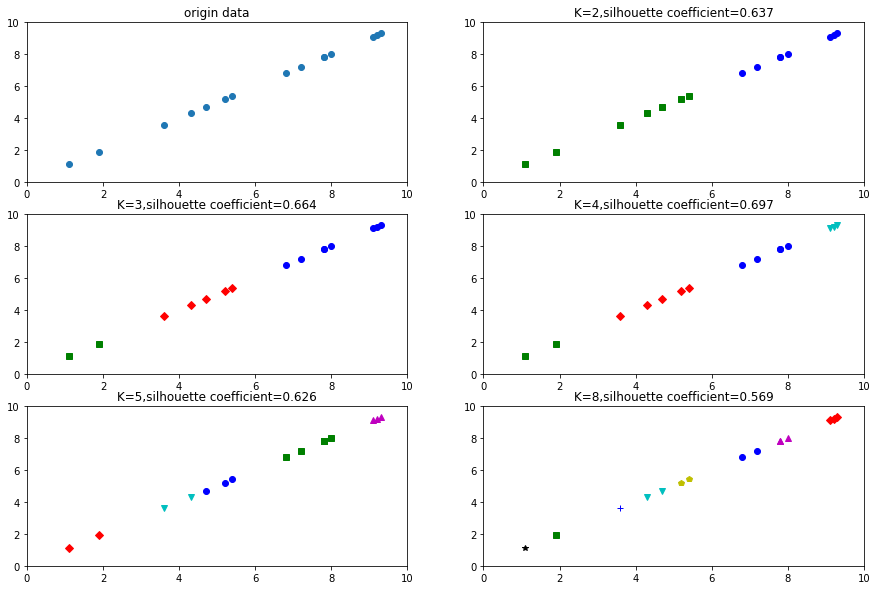

In [13]:
#构建网格，用于绘制子图
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('origin data')
plt.scatter(x1,x2)

colors = ['b','g','r','c','m','y','k','b']
markers = ['o','s','D','v','^','p','*','+']

clusters = [2,3,4,5,8]
subplot_counter = 1

sc_scores = []

for i in clusters:
    subplot_counter += 1
    plt.subplot(3,2,subplot_counter)
    kmeans_model = KMeans(n_clusters=i).fit(X)
    
    for j,l in enumerate(kmeans_model.labels_):
        #print('k=%s,index=%s,label=%s'%(i,j,l))
        plt.plot(x1[j],x2[j],color=colors[l],marker=markers[l],ls='None')
    plt.xlim(0,10)
    plt.ylim(0,10)
    #metric使用euclidean欧几里得距离
    sc_score = silhouette_score(X,kmeans_model.labels_,metric='euclidean')
    sc_scores.append(sc_score)
    
    plt.title('K=%s,silhouette coefficient=%0.03f'%(i,sc_score))

plt.show()

### k-mean聚类的特点

##### k-means算法采用迭代式算法，直观易懂方便实用。但是有量大缺陷：1.容易收敛到局部最优解。2.需要预先设定簇的数量
##### 工程中总是通过多次执行k-means算法来找到最好的初始中心点。

##### 可以使用“肘部观察法”粗略的估计相对合理的簇类个数。因为K-means模型最终期望所有数据点到其所属的簇类距离的平方和趋于稳定，
##### 所以我们可以通过观察这个数值随着K的走势来找出最佳的簇类数量。理想情况下这个折线在不断下降并且趋于平缓的过程，在这个过程中会出现斜率的
##### 拐点。从这个拐点开始，簇类中心的增加不会过于破坏数据聚类的结构。这个拐点就是最佳的K值


### 肘部观察法

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [16]:
#产生0.1到2.1之间的均匀分布的5行2列的矩阵
c1 = np.random.uniform(0.1,2.1,(5,2))
c2 = np.random.uniform(5.1,7.1,(5,2))
c3 = np.random.uniform(9.5,9.9,(5,2))

In [17]:
#将三个矩阵按垂直方向拼接
data = np.vstack((c1,c2,c3))

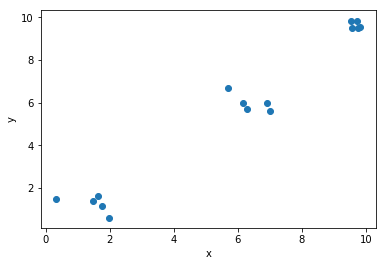

In [18]:
#绘制data对应的散点图
plt.scatter(data[:,0],data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
#测试取不同K值的聚集质量

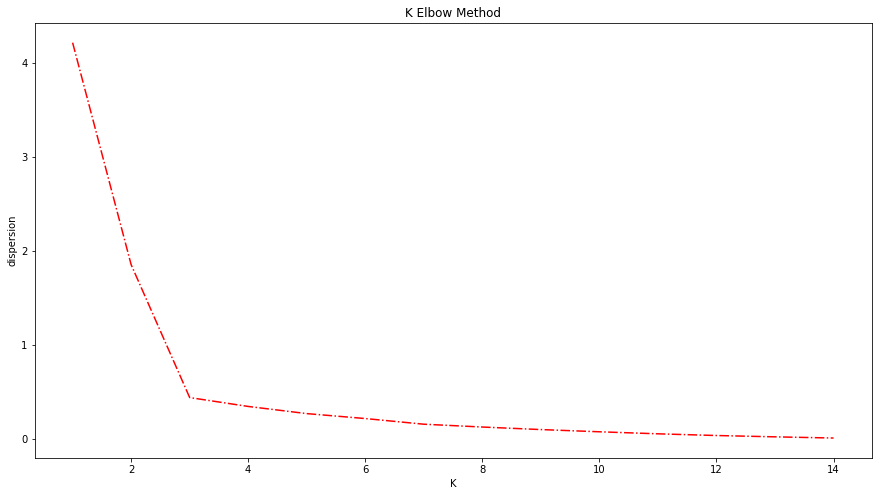

In [19]:
K = range(1,15)
#离差
dispersion = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    dispersion.append(sum(np.min(cdist(data,kmeans.cluster_centers_,'euclidean'),axis=1)) / data.shape[0])
plt.figure(figsize=(15,8))
plt.plot(K,dispersion,'r-.')
plt.xlabel('K')
plt.ylabel('dispersion')
plt.title('K Elbow Method')
plt.show()

In [20]:
kmeans.cluster_centers_

array([[ 1.46151389,  1.40340632],
       [ 9.78574364,  9.52477995],
       [ 6.15385163,  6.00716655],
       [ 0.33351336,  1.47821266],
       [ 6.89311329,  5.96630266],
       [ 1.96947193,  0.61006445],
       [ 9.72085879,  9.85192162],
       [ 5.69078827,  6.67129693],
       [ 1.77058981,  1.13330987],
       [ 6.27918252,  5.70668013],
       [ 6.98858797,  5.62589883],
       [ 1.64393893,  1.60357395],
       [ 9.53528718,  9.81000951],
       [ 9.57248102,  9.51196922]])